In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

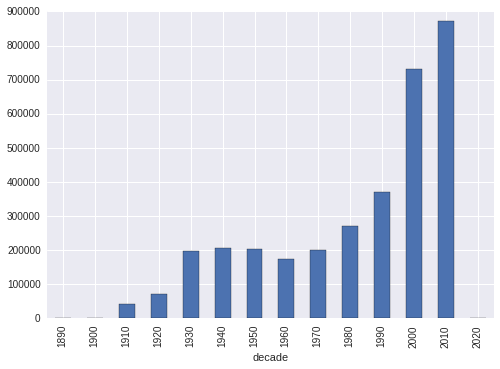

In [14]:
cast["decade"] = cast["year"]//10 *10
cast.groupby("decade").size().plot(kind="bar")


### Use groupby() to plot the number of "Hamlet" films made each decade.

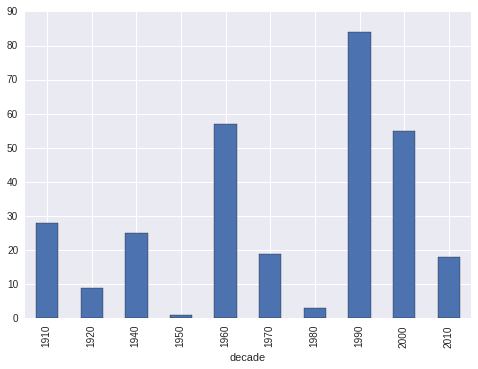

In [15]:
cast[cast.title=="Hamlet"].groupby("decade").size().plot(kind="bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

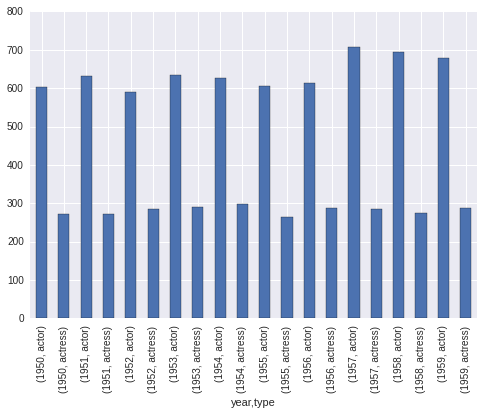

In [11]:
c = cast[(cast.n==1) & (cast.year//10 == 195)]
d = c.groupby(['year','type']).size().plot(kind="bar")
#d.head()

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

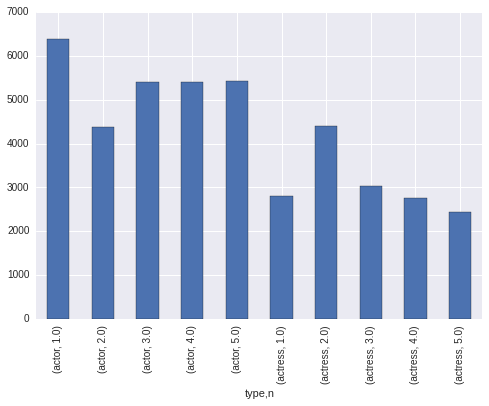

In [21]:
c = cast[(cast.n<=5) & (cast.year//10 == 195)]
d = c.groupby(['type','n']).size().plot(kind="bar")


### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [19]:
cast[cast.title.str.contains("Pink Panther")].groupby("title").size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  108
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
The Return of the Pink Panther     30
Trail of the Pink Panther          40
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [19]:
df =cast[cast.name=="Frank Oz"].groupby(["year","title"]).size()
df[df>2]
#df.sort().head()

year  title                                   
1979  The Muppet Movie                            8
1981  The Great Muppet Caper                      6
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [20]:
df =cast[cast.name=="Frank Oz"].groupby(["character"]).size()
df[df>2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Miss Piggy        6
Sam the Eagle     5
Yoda              5
dtype: int64